In [20]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120

print(f"Using Cantera version: {ct.__version__}")

Using Cantera version: 2.6.0


In [21]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile("gri30.yaml")}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ("CH4", "O2", "N2", "CO2", "H2O")]
gas1 = ct.Solution(thermo="IdealGas", species=complete_species)

phi = np.linspace(0.5, 2.0, 100)
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 298, ct.one_atm
    gas1.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T_complete[i] = gas1.T

C:\Users\viraj\AppData\Local\Temp/ipykernel_9964/3096239445.py:2: DeprecationWarning: Static method 'listFromFile' is renamed to 'list_from_file'. The old name will be removed after Cantera 2.6.
  species = {S.name: S for S in ct.Species.listFromFile("gri30.yaml")}


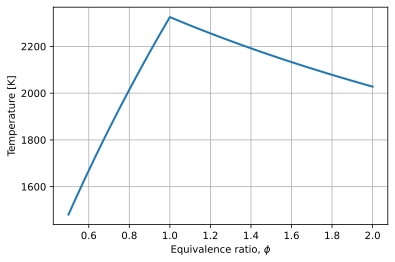

In [22]:
plt.plot(phi, T_complete, label="complete combustion", lw=2)
plt.grid(True)
plt.xlabel(r"Equivalence ratio, $\phi$")
plt.ylabel("Temperature [K]");

In [23]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile("gri30.yaml")}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ("CH4", "O2", "N2", "CO2", "H2O")]
gas1 = ct.Solution(thermo="IdealGas", species=complete_species)

phi = 2.0
gas1.TP = 298, ct.one_atm
gas1.set_equivalence_ratio(phi, "CH4", "O2:1, N2:3.76")
gas1.equilibrate("HP")
T_complete = gas1.T

C:\Users\viraj\AppData\Local\Temp/ipykernel_9964/398092665.py:2: DeprecationWarning: Static method 'listFromFile' is renamed to 'list_from_file'. The old name will be removed after Cantera 2.6.
  species = {S.name: S for S in ct.Species.listFromFile("gri30.yaml")}


In [24]:
T_complete

2027.8963204694035